In [2]:
import numpy as np
import pandas as pd
import sklearn as sk

# Wine classification

In [3]:
from sklearn.datasets import load_wine
dataset = load_wine ()
X = dataset[ "data" ]
y = dataset[ "target" ]
feature_names= dataset["feature_names"]
wine = pd.DataFrame(X,columns=feature_names)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

Tree plot

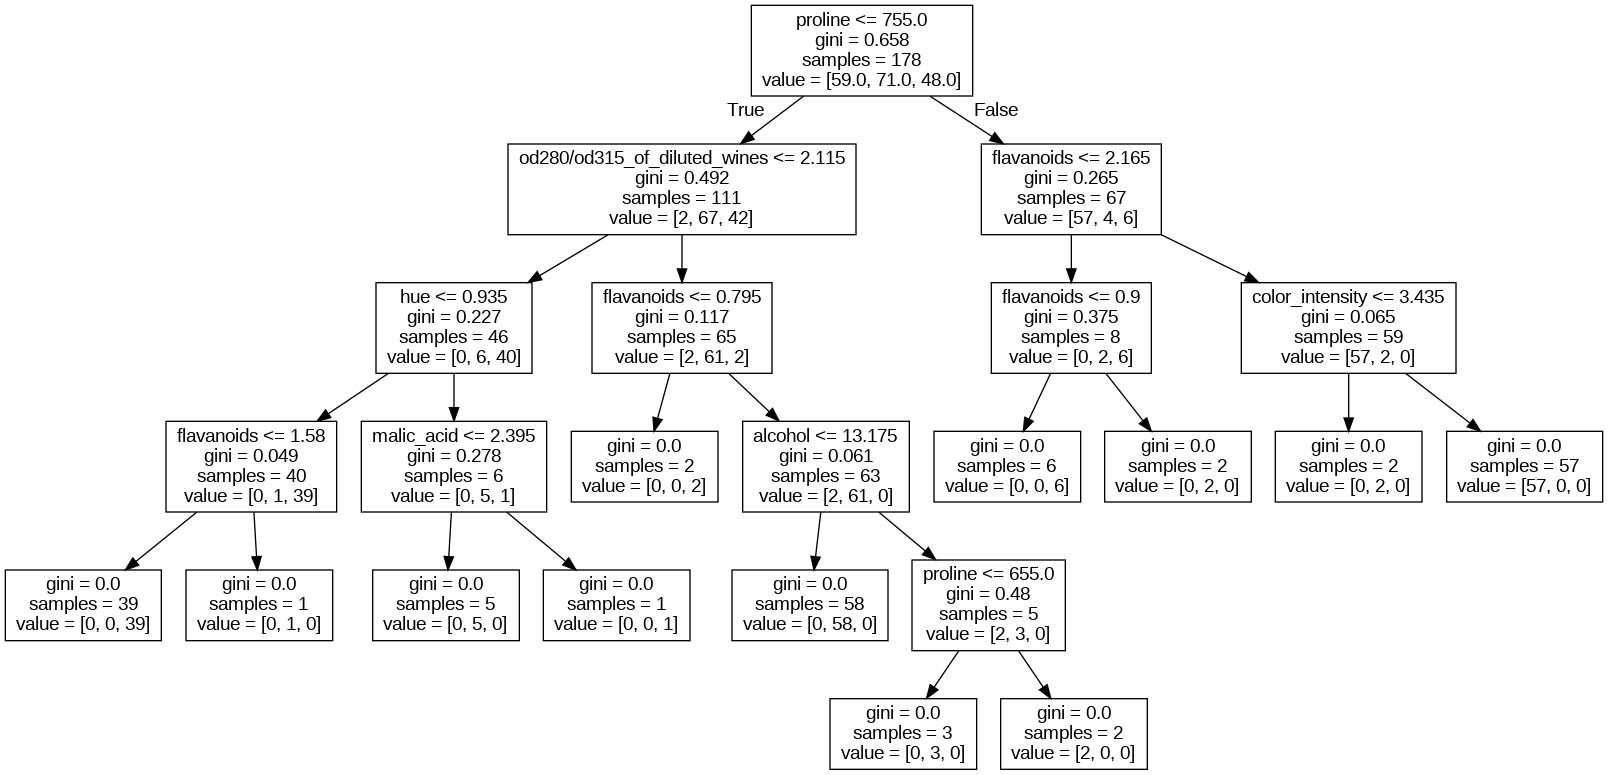

In [5]:
import pydot
from IPython . display import Image
from sklearn . tree import export_graphviz
# here , features is a list of names , one for each feature
# this makes the resulting tree visualization more comprehensible
dot_code = export_graphviz ( clf , feature_names = feature_names )
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

In [6]:
from  sklearn.metrics import accuracy_score,classification_report
y_pred = clf.predict(X)
accuracy = accuracy_score(y,y_pred)
print(accuracy)
#ofc accuracy is 1.0 because the test dataset is contained in the train so the model already saw everything

1.0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100 ,"%")
print(classification_report(y_test,y_pred))

88.11188811188812 %
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.84      0.90      0.87        59
           2       0.89      0.84      0.86        37

    accuracy                           0.88       143
   macro avg       0.89      0.88      0.88       143
weighted avg       0.88      0.88      0.88       143



Best parameter choice

In [8]:
def parameters_testing(config):
  clf = DecisionTreeClassifier(**config)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy


In [33]:
from sklearn.model_selection import ParameterGrid
def best_parameters():
  params = {
  "max_depth" : [ None , 2 , 4 , 8] ,
  "splitter" : [ "best" , "random" ]
  }
  best = 0
  for config in ParameterGrid ( params ) :
    accuracy = parameters_testing(config)
    print(f"Max depth: {config["max_depth"]}, Splitter: {config["splitter"]}. Accuracy: \t{accuracy}" )
    if accuracy > best :
      best = accuracy
      best_config = config
  return best_config

In [37]:
print(f"\nBest parameters: {best_parameters()}")

Max depth: None, Splitter: best. Accuracy: 	0.8251748251748252
Max depth: None, Splitter: random. Accuracy: 	0.8811188811188811
Max depth: 2, Splitter: best. Accuracy: 	0.8811188811188811
Max depth: 2, Splitter: random. Accuracy: 	0.8531468531468531
Max depth: 4, Splitter: best. Accuracy: 	0.8881118881118881
Max depth: 4, Splitter: random. Accuracy: 	0.8741258741258742
Max depth: 8, Splitter: best. Accuracy: 	0.8391608391608392
Max depth: 8, Splitter: random. Accuracy: 	0.7762237762237763

Best parameters: {'max_depth': 4, 'splitter': 'best'}


K-fold Cross-validation

In [41]:
def parameters_testing(config,X_train , X_test , y_train , y_test):
  clf = DecisionTreeClassifier(**config)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [42]:
from sklearn.model_selection import ParameterGrid
def best_parameters(X_train , X_test , y_train , y_test):
  params = {
  "max_depth" : [ None , 2 , 4 , 8] ,
  "splitter" : [ "best" , "random" ]
  }
  best = 0
  for config in ParameterGrid ( params ) :
    accuracy = parameters_testing(config,X_train , X_test , y_train , y_test)
    print(f"Max depth: {config["max_depth"]}, Splitter: {config["splitter"]}. Accuracy: \t{accuracy}" )
    if accuracy > best :
      best_accuracy = accuracy
      best_config = config
  return best_config,best_accuracy

In [44]:
from sklearn.model_selection import KFold
# Split the datasets into two :
# - X_train_valid : the dataset used for the k - fold cross - validation
# - X_test : the dataset used for the final testing ( this will NOT
# be seen by the classifier during the training / validation phases )
X_train_valid , X_test , y_train_valid , y_test = train_test_split (X,y,test_size=0.8)
kf = KFold (5) # 5 - fold cross - validation
# X and y are the arrays to be split
for train_indices , validation_indices in kf.split ( X_train_valid ) :
  X_train = X_train_valid [ train_indices ]
  X_valid = X_train_valid [ validation_indices ]
  y_train = y_train_valid [ train_indices ]
  y_valid = y_train_valid [ validation_indices ]

  best_config,best_accuracy = best_parameters(X_train,X_valid,y_train,y_valid)
  if best_accuracy > accuracy :
    accuracy = best_accuracy
    best_config = best_config
    best_split = [train_indices , validation_indices]

print(f"\nBest parameters: {best_config}")#how should i perform the testing after saving the best config?
print(f"Accuracy: {accuracy}")

clf = DecisionTreeClassifier(**config)
clf.fit(X_train_valid[best_split[0]],y_train_valid[best_split[1]])
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)









Max depth: None, Splitter: best. Accuracy: 	0.7142857142857143
Max depth: None, Splitter: random. Accuracy: 	0.7142857142857143
Max depth: 2, Splitter: best. Accuracy: 	0.7142857142857143
Max depth: 2, Splitter: random. Accuracy: 	0.42857142857142855
Max depth: 4, Splitter: best. Accuracy: 	0.8571428571428571
Max depth: 4, Splitter: random. Accuracy: 	0.8571428571428571
Max depth: 8, Splitter: best. Accuracy: 	0.7142857142857143
Max depth: 8, Splitter: random. Accuracy: 	0.42857142857142855
Max depth: None, Splitter: best. Accuracy: 	0.8571428571428571
Max depth: None, Splitter: random. Accuracy: 	0.8571428571428571
Max depth: 2, Splitter: best. Accuracy: 	1.0
Max depth: 2, Splitter: random. Accuracy: 	0.8571428571428571
Max depth: 4, Splitter: best. Accuracy: 	0.7142857142857143
Max depth: 4, Splitter: random. Accuracy: 	0.5714285714285714
Max depth: 8, Splitter: best. Accuracy: 	0.8571428571428571
Max depth: 8, Splitter: random. Accuracy: 	0.7142857142857143
Max depth: None, Splitter

ValueError: Number of labels=7 does not match number of samples=28